# Table of content

- 1. Import libraries

- 2. Set path

- 3. Import file

- 4. Data Pre-processing
    - 4.1 Standardization of data
    
- 5. Elbow Technique

- 6. K-means clustering

- 7. Plots
    - 7.1 Accommodates vs. Price per night
    - 7.2 Price per night vs. Review Scores Rating
    - 7.3 Review Score ratings vs. Number of reviews per month
    - 7.4 Accommodates vs. Number of Reviews
    - 7.5 Host Response Rate vs. Number of Reviews

- 8. Interpretation and Further Analysis Ideas


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
from scipy import stats 

In [2]:

%matplotlib inline

# Set Path

In [3]:
path = '/Users/phongsathorn/Documents/Data Analytics/CareerFoundry/Achievement 6 - AirBnB Project'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data','AirBnB Amsterdam','listings_airbnb_netherlands_CLEAN_map.pkl'))

In [5]:
df.shape

(19946, 38)

In [6]:
df.columns

Index(['listing_id', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'property_type',
       'accommodates', 'first_review', 'review_scores_value',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_rating', 'maximum_nights',
       'host_is_superhost', 'host_response_time', 'host_response_rate',
       'street', 'market', 'neighbourhood_cleansed', 'host_identity_verified',
       'instant_bookable', 'price_per_night', 'has_license', 'Price_class'],
      dtype='object')

In [7]:
df1=df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','accommodates','review_scores_rating','host_response_rate']]

In [8]:
df1.shape

(19946, 10)

In [9]:
df1.isnull().sum()

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2389
calculated_host_listings_count       0
accommodates                         0
review_scores_rating              2620
host_response_rate                9421
dtype: int64

In [10]:
# Drop rows with missing values in the specific column
df1 = df1.dropna(subset=['host_response_rate'])
df1 = df1.dropna(subset=['review_scores_rating'])


In [11]:
df1.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
accommodates                      0
review_scores_rating              0
host_response_rate                0
dtype: int64

## Pre processing

### Standardization of values

In [12]:
# Z-Score using scipy 

df1['price'] = stats.zscore(df1['price'])

In [13]:
df1.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,accommodates,review_scores_rating,host_response_rate
0,52.365755,4.941419,-0.807475,3,248,2.10,1,2,97.0,100.0
1,52.390225,4.873924,0.028264,4,42,1.03,1,5,96.0,100.0
2,52.365087,4.893541,-0.633708,1,233,2.18,2,2,87.0,100.0
3,52.373114,4.883668,-0.261349,14,1,0.09,2,3,100.0,100.0
4,52.386727,4.892078,-0.054482,2,171,2.03,1,2,99.0,100.0


# Elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/phongsathorn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/phongsathorn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/phongsathorn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/phongsathorn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-40887845.78423162,
 -22055070.711798444,
 -14461225.03939443,
 -10076223.525236998,
 -8185229.202089026,
 -6343292.786665583,
 -5315521.448466856,
 -4324824.26967539,
 -3603997.4490973004]

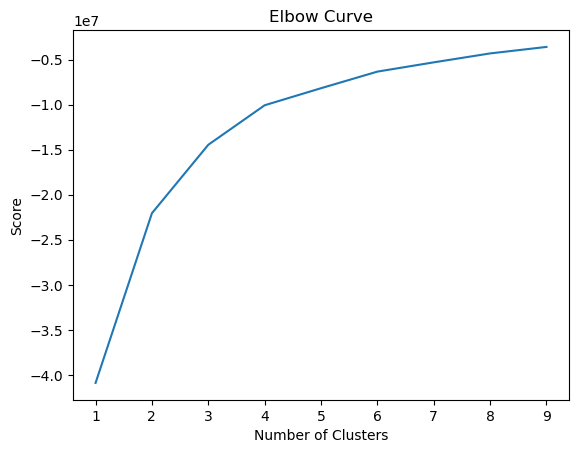

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**NOTE**

- choose 4 cluster because the slope after 4 seems to be flattened more and more

# 6. K-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [18]:
# Fit the k-means object to the data.

kmeans.fit(df1)

/Users/phongsathorn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [19]:
# create a new column containing the number of the cluster that the 
#respective value belongs to in the df
df1['clusters'] = kmeans.fit_predict(df1)

/Users/phongsathorn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
df1.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,accommodates,review_scores_rating,host_response_rate,clusters
0,52.365755,4.941419,-0.807475,3,248,2.10,1,2,97.0,100.0,1
1,52.390225,4.873924,0.028264,4,42,1.03,1,5,96.0,100.0,0
2,52.365087,4.893541,-0.633708,1,233,2.18,2,2,87.0,100.0,1
3,52.373114,4.883668,-0.261349,14,1,0.09,2,3,100.0,100.0,0
4,52.386727,4.892078,-0.054482,2,171,2.03,1,2,99.0,100.0,2


In [21]:
df1['clusters'].value_counts()

clusters
0    8002
2     982
3     278
1     241
Name: count, dtype: int64

# 7. Plots

### 7.1 Price per night vs. Accomodates

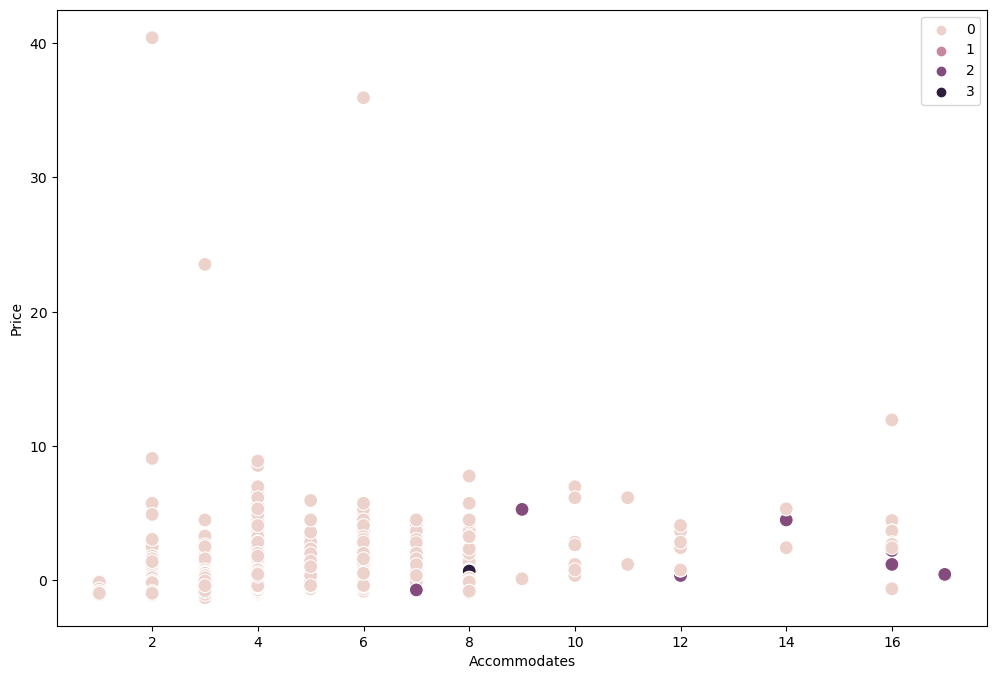

In [22]:
# Plot the clusters for the variables of 'price_per_night' 'accommodates'.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['accommodates'], y=df1['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Accommodates') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

**NOTE**

It seems like the disptribution of price per night does not matter when it comes to accommodates. 

Around 8000 from cluster 0, data points are centered around 2 to 4 but the price for them range from 2 to 16 (after z-standardization).

8/900 data points from cluster seems to be around 2 and 8, but the price ranges up to the max. price.


### 7.2 Price per night vs. review scores rating

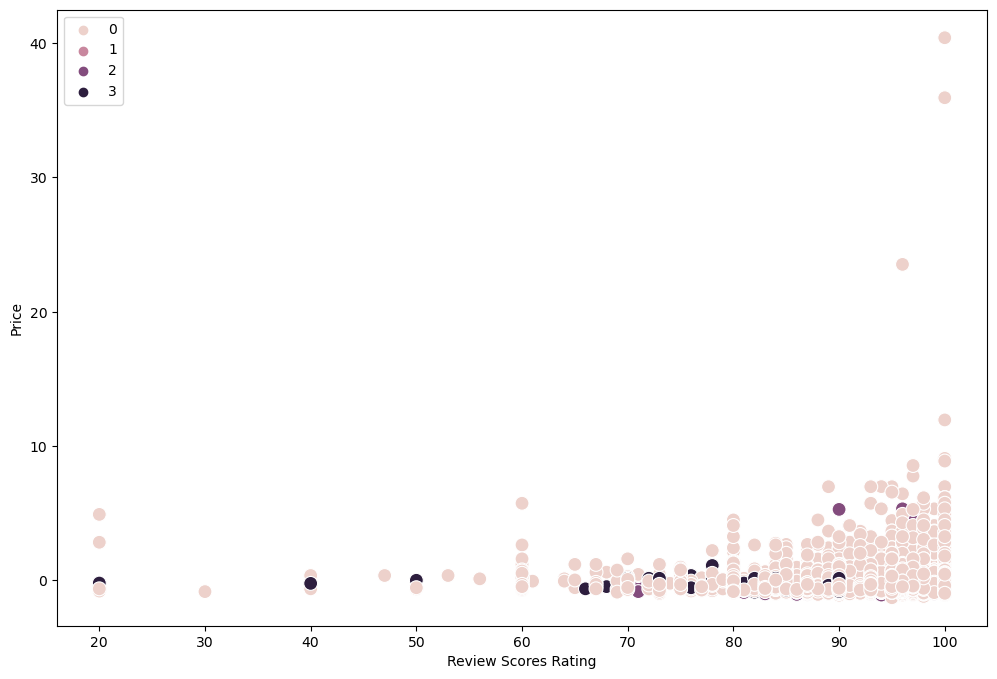

In [23]:
# Plot the clusters for the variables of 'price_per_night' 'accommodates'.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['review_scores_rating'], y=df1['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review Scores Rating') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

**NOTE**
- Points in cluster = 0, Scores rating is mostly between 80 to 100 while price per night is around 0 and 9 (after Z-standardization). Some ratings,however, still can be seen at prce per night is 20 or 50. But those are the one with 100 rating score.

- Few points from cluster 2 are between 40 to 80 scores points.


### 7.3 Score ratings vs. reviews per month

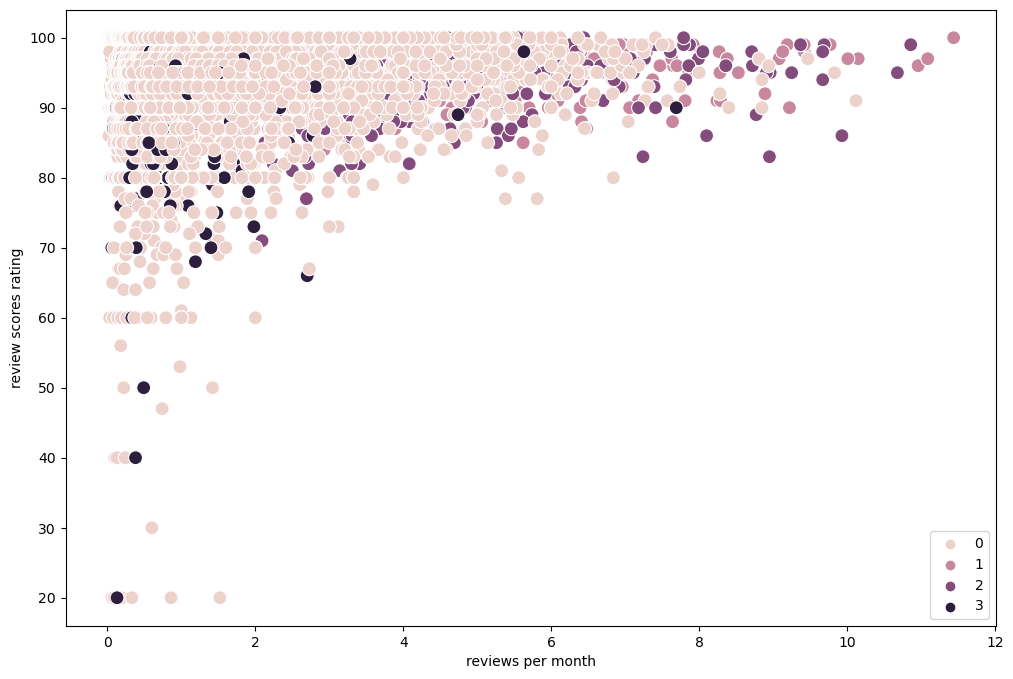

In [24]:
# Plot the clusters for the variables of 'price_per_night' 'accommodates'.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['reviews_per_month'], y=df1['review_scores_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('reviews per month') # Label x-axis.
plt.ylabel('review scores rating') # Label y-axis.
plt.show()

**NOTE**

- the majority of scores over 80 are given to cluster 0.

- listings with score rating 80 to 100 also happes to listings with low reviews per months.

- Review scores < 60 seems to be made by cluster 0, but only when the listings had a review per months between 0 and 2.

- Cluster 1,2,3 also give scores from 70 to 100. With some exceptions with 20- 50 scores.

- Lisings with 7 to 12 reviews per months received more points from cluster 1,2,3 than from cluster 0.


### 7.4 Accommodates vs. number of reviews

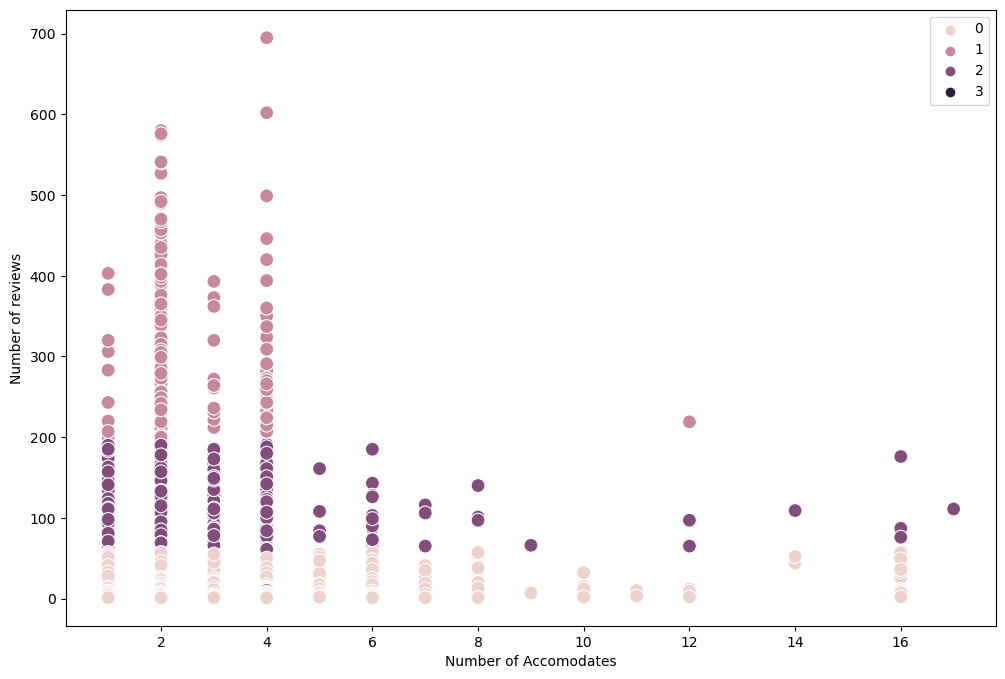

In [25]:
# Plot the clusters for the variables of 'price_per_night' 'accommodates'.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['accommodates'], y=df1['number_of_reviews'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Accomodates') # Label x-axis.
plt.ylabel('Number of reviews') # Label y-axis.
plt.show()

**NOTE:**

- cluster 0
    - Offer accommodates from 1 to 16 
    - number of reviews always below 10
    - majority of listings are around 1-4 accommodates

- cluster 3
    - offer accommodates from 1 to 16 ( in 16, fewer than cluster 0)
    - number of reviews between 90 and 200.
    - majority of listings are around 1 -4
    
- cluster 1
    - accomodates between 1 - 4
    - only 1 listings for accommodates = 12
    - Number of reviews between 200 and 700
    - majority of listings are for accomodates = 2 and

### 7.5 Host response rate vs Number of reviews

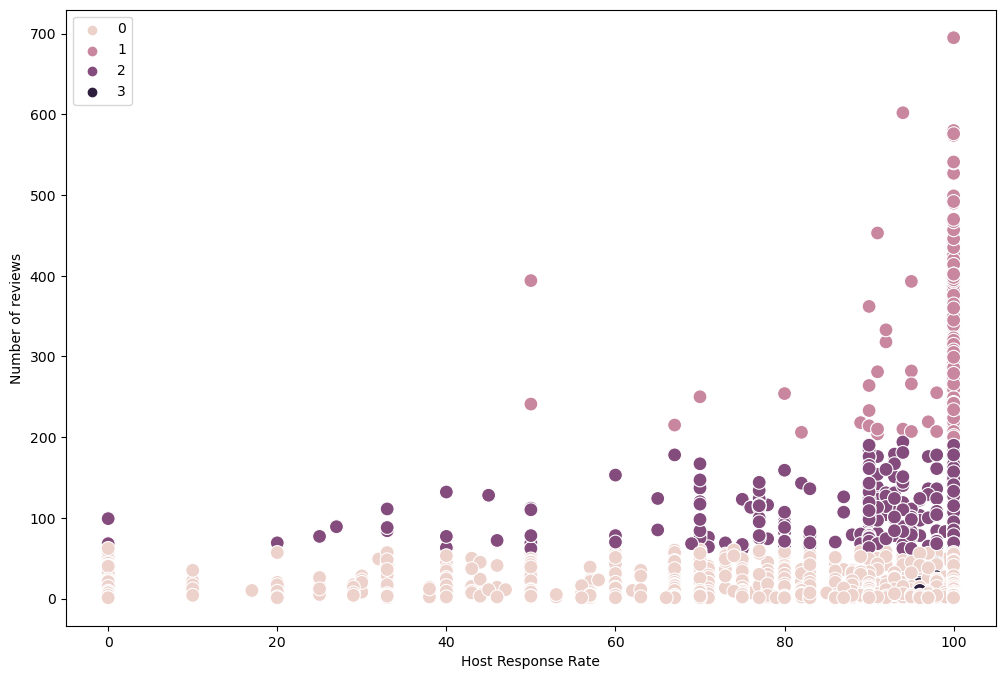

In [26]:
# Plot the clusters for the variables of 'price_per_night' 'accommodates'.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['host_response_rate'], y=df1['number_of_reviews'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Host Response Rate') # Label x-axis.
plt.ylabel('Number of reviews') # Label y-axis.
plt.show()

**NOTE**

- Cluster 0
    - Listings with host response rate from 0 to 100
    - Not more than 100 reviews
    
- Cluster 3
    - Listings with host response rate from 0 to 100
    - Have between 90 to 190 reviews
    - Most listings have 90 -100 response rate
    
- Cluster 1
    - Listings with host response rate from 50 to 100
    - Have between 200 - 700 reviews, most of them with 100 response rate 
    - only few data points have response rate of 50

In [29]:
df1.loc[df1['clusters'] == 3, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 2, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'dark pink'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

In [32]:
df1.groupby('cluster').agg({'price':['mean', 'median'], 
                         'accommodates':['mean', 'median'], 
                         'review_scores_rating':['mean', 'median'],
                          'number_of_reviews':['mean', 'median'],
                          'reviews_per_month':['mean','median'],
                           'host_response_rate':['mean','median']})

price           accommodates        review_scores_rating  \
                 mean    median         mean median                 mean   
cluster                                                                    
dark pink   -0.469897 -0.550961     2.373444    2.0            94.925311   
dark purple -0.209974 -0.302722     2.992806    3.0            88.654676   
pink         0.050844 -0.153778     2.933517    2.0            95.333292   
purple      -0.239550 -0.426842     2.712831    2.0            94.800407   

                   number_of_reviews        reviews_per_month         \
            median              mean median              mean median   
cluster                                                                
dark pink     96.0        291.871369  264.0          5.354357  5.230   
dark purple   90.0         11.413669    8.0          0.860108  0.615   
pink          97.0         16.818295   12.0          1.131415  0.790   
purple        96.0        103.197556   93.0          3.079695  2.625   

            host_response_rate         
                          mean median  
cluster                                
dark pink            98.535270  100.0  
dark purple          96.748201   96.0  
pink                 93.483379  100.0  
purple               96.400204  100.0

# 8. Interpretation and further analysis Ideas

###### Dark Pink Cluster (Cluster 1):

Overall, Cluster 1 (Dark Pink) has almost the best statistical values:

Price: -0.55
Accommodates: 2
Review scores rating: 96
Number of reviews: 264 (median)
Reviews per month: 5.2
Host response rate: 100%


The only time Cluster 1 has a lower value is for the review scoring rate (96), which is lower than Cluster 3 (DarkPurple).
However, Cluster 1 has significantly more numbers of reviews and number of reviews per month compared to other clusters, making the listed items more trustworthy in terms of overall scoring, reviews and host response rate.


#####  Pink Cluster (Cluster 0):

Cluster 0 has the second highest price median but the same scoring ratings as cluster 1 (96). However, the number of reviews is not as high as cluster 1 but host response is 100%.



##### Purple Cluster (Cluster 2):

Cluster 2 has lower price median and the lowest scores ratings among all clusters (90). Apart from this, properties in this cluster also have the lowest number of reviews(8)and host response rate (96%).
Items listed in this cluter are in areas with fewer people compared to other clusters. Therefore, the review scores might be 90 but is not trustworthy since it only has 8 reviews.


##### Dark Purple Cluster (Cluster 3):


The Dark Purple Cluster ( Cluster 3) has the lowest price median and the highest score ratings (97) among all clusters and is even better than cluster 1. However, the number of reviews is only 12 with 0.79 reviews per month is not high enough to justify the score of 97.


##### Relationships Between Variables:
Based on the clustering analysis, it's evident that properties vary significantly in terms of price, number of reviews, host response rate, and reviews per month. Higher-priced properties tend to exhibit higher host response rates and receive more reviews compared to lower-priced ones. This suggests that higher-priced properties are generally more reliable in terms of host responsiveness and overall customer satisfaction, as indicated by the higher number of reviews.

In contrast, lower-priced properties typically have fewer reviews and may not be as reliable in terms of host response rates and overall ratings. This could imply that guests perceive higher-priced properties as offering better value for money, leading to more engagement and feedback.

Overall, the clustering analysis highlights a clear association between price, host responsiveness, and customer feedback, with higher-priced properties generally offering a more reliable and satisfactory experience for guests.


### Further analysis:

* Find out which listing_id belongs to which cluster
    * Where are they located?
    * How do they look like?
    * Who are the hosts?
    * How to increase the number of reviews?
    * Will the number of listings increase?
    
### Apart from this, the results are usefull for Marketing strategy:

- properties in the "Dark Pink" cluster with higher review ratings and more reviews could be targeted for premium marketing campaigns

- properties in the "Pink" and "Purple" clusters with lower review ratings and fewer reviews require different marketing approaches to improve their visibility and attract more guests


- Dynamic Pricing Strategies:
    - properties in clusters with higher review ratings and more reviews could command higher prices during peak seasons
    - properties in clusters with lower review ratings and fewer reviews may benefit from competitive pricing to attract more bookings
    
- Property Management Optimization:
    - Optimize property management operations based on cluster insights. Properties in clusters with higher demand (e.g., "Dark Pink" and "Dark Purple") could receive more attention in terms of maintenance, upgrades, and customer service to maintain their high ratings and attract more guests.


- Predictive Modeling:
    - Use cluster labels as features in predictive models to forecast future trends, such as demand forecasting, price prediction, and guest satisfaction prediction. Incorporating cluster information can improve the accuracy of predictive models by capturing the heterogeneity in property characteristics and guest preferences across different clusters.

In [34]:
# original dataframe to excel
df.to_excel(os.path.join(path,'02 Data','AirBnB Amsterdam','listings_airbnb_netherlands_CLEAN_map.xlsx'))

# dataframe with k-means to excel
df1.to_excel(os.path.join(path,'02 Data','AirBnB Amsterdam','listings_airbnb_netherlands_CLEAN_map_cluster.xlsx'))
df1.to_csv(os.path.join(path, '02 Data','AirBnB Amsterdam', 'listings_airbnb_netherlands_CLEAN_map_cluster.csv'))